In [6]:
import iris
import numpy as np
from iris.coords import DimCoord
from iris.coord_systems import TransverseMercator,GeogCS
from iris.cube import Cube
from cf_units import Unit
import cf_units
import os
import glob
from pyproj import Proj, transform
import sys
import warnings
import multiprocessing as mp
import cartopy.crs as ccrs

warnings.filterwarnings("ignore")

ems_hourly = ['01', '04', '06', '07', '08', '09', '10', '11', '12', '13', '15']
ems_30mins = ['bc005', 'bc006', 'bc007', 'bc009', 'bc010', 'bc011', 'bc013',  'bc015',  'bc016', 'bc017', 'bc018', 'bc012']
yrs_range = '1980_2001'

In [7]:
##########################################################################################
#########################################################################################
# Define variables and set up environment
##########################################################################################
##########################################################################################
root_fp = "/nfs/a319/gy17m2a/"
os.chdir(root_fp)

# Create path to files containing functions
sys.path.insert(0, root_fp + 'PhD/Scripts/DataProcessing/Regridding')
from Regridding_functions import *
# Create path to files containing functions
sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from Spatial_plotting_functions import *
from Spatial_geometry_functions import *

gb_gdf = create_gb_outline({'init' :'epsg:3857'})

# Load UKCP18 12km model data to use in regriddding
file_model_12km=f'/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/12km/01/{yrs_range}/pr_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc'
cube_12km=iris.load_cube(file_model_12km)

file_model_2_2km ='/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/2.2km/01/1980_2001/pr_rcp85_land-cpm_uk_2.2km_01_1hr_19910601-19910630.nc'
cube_2km =iris.load_cube(file_model_2_2km)

# remove ensemble member dimension
cube_2km = cube_2km[0,:,:,:]
cube_12km = cube_12km[0,:,:,:]

In [8]:
##################################################################
# This is a square area surrounding Leeds
leeds_at_centre_gdf = create_leeds_at_centre_outline({'init' :'epsg:3857'})
cube_12km_trimmed_to_leeds =  trim_to_bbox_of_region_obs(cube_12km, leeds_at_centre_gdf, 'projection_y_coordinate',
                                                        'projection_x_coordinate')

In [9]:
yrs_range = '1980_2001'
# ems_hourly = ['04', '06', '07', '08', '09', '10', ]

### Check plotting

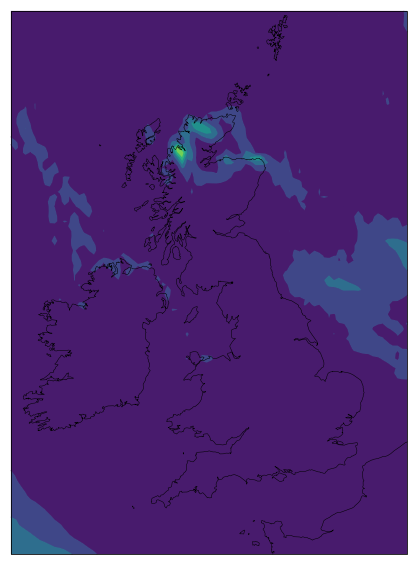

In [10]:
fig, ax= plt.subplots(figsize=(20,10))
iplt.contourf(cube_12km[1,:,:])
plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);
# fig, ax= plt.subplots()
# iplt.contourf(cube_2km[1,:,:])
# plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);

## Transform cube 12km to WGS84

In [11]:
# this is the crs that we want to transform to
source_crs_12km = ccrs.OSGB(approx=False)
# these are the crs we are transforming from
target_crs = ccrs.Geodetic()

In [94]:
for em in ['01','04', '05', '06', '07', '08', '09', '10', '11', '12', '13','14','15']:
# for em in ['01']:
    print(em)
    os.chdir(f"/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/12km/{em}/{yrs_range}/")
    output_fp = f"/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/12km_wgs84/{em}/{yrs_range}/"
    if not os.path.isdir(output_fp):
        os.makedirs(output_fp)
    for filename in glob.glob("*"):    
        if not os.path.isfile(output_fp +  f"wgs84_{filename}"):
            print("already exist")
        else:
            print(filename)
            cube = iris.load(filename)[0]
            # transform to wgs84
            transformed_cube_12km = convert_to_wgs84 (source_crs_12km, target_crs, cube_12km,'projection_x_coordinate', 'projection_y_coordinate')
            # Save 
            iris.save(transformed_cube_12km, output_fp +  f"wgs84_{filename}")     

01
pr_rcp85_land-rcm_uk_12km_01_day_20401201-20501130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20601201-20701130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20501201-20601130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20201201-20301130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20001201-20101130.nc
pr_rcp85_land-rcm_uk_12km_01_day_19901201-20001130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20301201-20401130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20101201-20201130.nc
pr_rcp85_land-rcm_uk_12km_01_day_20701201-20801130.nc
pr_rcp85_land-rcm_uk_12km_01_day_19801201-19901130.nc
04
pr_rcp85_land-rcm_uk_12km_04_day_20501201-20601130.nc
pr_rcp85_land-rcm_uk_12km_04_day_19901201-20001130.nc
pr_rcp85_land-rcm_uk_12km_04_day_20601201-20701130.nc
pr_rcp85_land-rcm_uk_12km_04_day_20301201-20401130.nc
pr_rcp85_land-rcm_uk_12km_04_day_20401201-20501130.nc
pr_rcp85_land-rcm_uk_12km_04_day_20101201-20201130.nc
pr_rcp85_land-rcm_uk_12km_04_day_19801201-19901130.nc
pr_rcp85_land-rcm_uk_12km_04_day_20201201-20301130.nc
pr_rcp85_land-rcm_uk_1

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/12km/14/1980_2001/'

In [26]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs  # For projections
# import numpy as np

# # Assuming transformed_cube_12km[1,:,:] is your 2D data array for plotting
# # And assuming you have the latitude and longitude arrays for your data, let's call them lat and lon
# data = transformed_cube_12km[1,:,:].data  # Extract data; ensure it's realized if it's lazy-loaded
# lat = transformed_cube_12km.coord('latitude').points
# lon = transformed_cube_12km.coord('longitude').points

# # Set up the plot with a projection
# fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': ccrs.PlateCarree()})
# # ax.set_global()  # Optional: Set the extent to global; adjust as needed
# ax.coastlines()  # Add coastlines for reference

# # Matplotlib's contourf expects matrices for X, Y, and Z. Ensure lat and lon form a meshgrid
# # Iris might give you 1D lat and lon arrays, so you need to create a meshgrid for plotting
# lon2d, lat2d = np.meshgrid(lon, lat)

# # Plot using contourf, specifying the transform for the data coordinates
# # Since your data is in latitude and longitude, use ccrs.Geodetic() for the transform
# contour = ax.contourf(lon2d, lat2d, data, transform=ccrs.PlateCarree(), cmap='viridis')  # Choose a colormap as needed

# # Add a colorbar
# plt.colorbar(contour, ax=ax, shrink=0.5, aspect=5)

# plt.show()


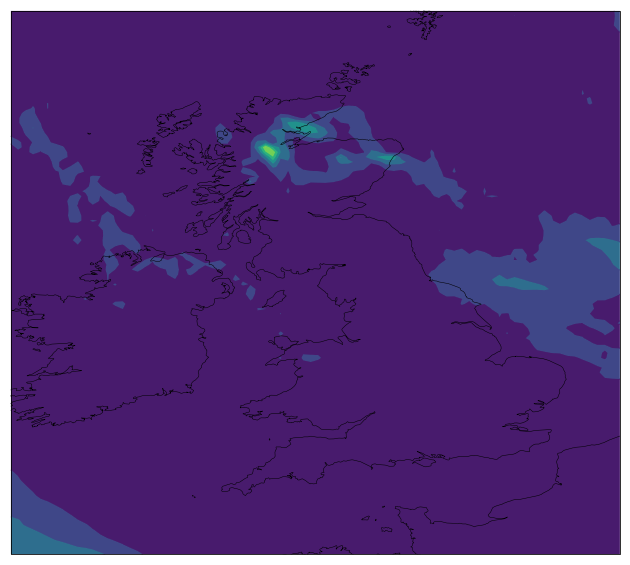

In [25]:
fig, ax= plt.subplots(figsize=(20,10))
iplt.contourf(transformed_cube_12km[1,:,:])
plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);
# fig, ax= plt.subplots()
# iplt.contourf(cube_2km[1,:,:])
# plt.gca().coastlines(resolution='10m', color='black', linewidth=0.5);